

*   Nama : Firhan Abdurrahman
*   NIM  : 1207050040




Kompresi gambar menggunakan K-mean Clustering

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import imageio

from scipy import misc
from sklearn.cluster import KMeans

In [ ]:
def read_image():
    img = misc.imread('/content/sample_data/domba.jpg')
    img = img / 255
    return img

In [ ]:
def initialize_means(img, clusters):
    points = np.reshape(img, (img.shape[0] * img.shape[1], img.shape[2]))
    m, n = points.shape
    means = np.zeros((clusters, n))
    for i in range(clusters):
        rand1 = int(np.random.random(1)*10)
        rand2 = int(np.random.random(1)*8)
        means[i, 0] = points[rand1, 0]
        means[i, 1] = points[rand2, 1]
    return points, means

In [ ]:
def distance(x1, y1, x2, y2):
    dist = np.square(x1 - x2) + np.square(y1 - y2)
    dist = np.sqrt(dist)
    return dist


def k_means(points, means, clusters):
    iterations = 10
    m, n = points.shape
    index = np.zeros(m)
    while iterations > 0:
        for j in range(len(points)):
            minv = 1000
            temp = None
            for k in range(clusters):
                x1 = points[j, 0]
                y1 = points[j, 1]
                x2 = means[k, 0]
                y2 = means[k, 1]
                if distance(x1, y1, x2, y2) < minv:
                    minv = distance(x1, y1, x2, y2)
                    temp = k
                    index[j] = k
        for k in range(clusters):
            sumx = 0
            sumy = 0
            count = 0
            for j in range(len(points)):
                if index[j] == k:
                    sumx += points[j, 0]
                    sumy += points[j, 1]
                    count += 1
            if count == 0:
                count = 1
            means[k, 0] = float(sumx / count)
            means[k, 1] = float(sumy / count)
        iterations -= 1
    return means, index

In [ ]:
def compress_image(means, index, img):
    # recovering the compressed image by
    # assigning each pixel to its corresponding centroid.
    centroid = np.array(means)
    recovered = centroid[index.astype(int), :]

    # getting back the 3d matrix (row, col, rgb(3))
    recovered = np.reshape(recovered, (img.shape[0], img.shape[1],
                                       img.shape[2]))

    # plotting the compressed image.
    plt.imshow(recovered)
    plt.show()

    # saving the compressed image.
    alamat_file_baru = '/content/sample_data/hasil/'
    imageio.imwrite(alamat_file_baru, recovered)

K-Means Image compressing #2

In [ ]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np

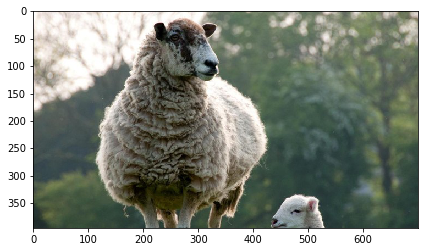

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


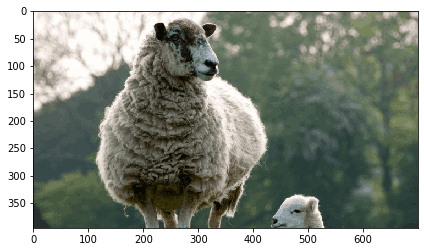

In [ ]:
image = io.imread('/content/sample_data/domba.jpg')
io.imshow(image)
io.show()

#Dimension of the original image
rows = image.shape[0]
cols = image.shape[1]

#Flatten the image
image = image.reshape(rows*cols, 3)

#Implement k-means clustering to form k clusters
kmeans = KMeans(n_clusters=64)
kmeans.fit(image)

#Replace each pixel value with its nearby centroid
compressed_image = kmeans.cluster_centers_[kmeans.labels_]
compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image = compressed_image.reshape(rows, cols, 3)

#Save and display output image
io.imsave('compressed_image.png', compressed_image)
io.imshow(compressed_image)
io.show()

Kompresi menggunakan Huffman Encoding

In [ ]:
import heapq
import os


In [ ]:
# A Huffman Tree Node
class Node:
    def __init__(self, prob, symbol, left=None, right=None):
        # Probabilitas
        self.prob = prob

        # simbol
        self.symbol = symbol

        # node kiri
        self.left = left

        # node kanan
        self.right = right

        # tree direction (0/1)
        self.code = ''

In [ ]:
""" Fungsi pembantu untuk mencetak kode simbol dengan melakukan proses Huffman Tree"""
codes = dict()

def Calculate_Codes(node, val=''):
    # huffman untuk kode terkini
    newVal = val + str(node.code)

    if(node.left):
        Calculate_Codes(node.left, newVal)
    if(node.right):
        Calculate_Codes(node.right, newVal)

    if(not node.left and not node.right):
        codes[node.symbol] = newVal
         
    return codes        

""" Fungsi pembantu untuk mencetak kode simbol dengan melakukan proses Huffman Tree"""
def Calculate_Probability(data):
    symbols = dict()
    for element in data:
        if symbols.get(element) == None:
            symbols[element] = 1
        else: 
            symbols[element] += 1     
    return symbols

""" Fungsi pembantu untuk mendapatkan encoded"""
def Output_Encoded(data, coding):
    encoding_output = []
    for c in data:
      #  print(coding[c], end = '')
        encoding_output.append(coding[c])
        
    string = ''.join([str(item) for item in encoding_output])    
    return string
        
""" Fungsi pembantu untuk menghitung perbedaan ruang antara data terkompresi dan tidak terkompresi"""    
def Total_Gain(data, coding):
    before_compression = len(data) * 8 # total bit yang disimpan pada data sebelum di kompresi
    after_compression = 0
    symbols = coding.keys()
    for symbol in symbols:
        count = data.count(symbol)
        after_compression += count * len(coding[symbol]) #menghitung sebarapa banyak bit yang di butuhkan oleh simbol secara total 
    print("Space usage before compression (in bits):", before_compression)    
    print("Space usage after compression (in bits):",  after_compression) 


In [ ]:
""" Fungsi pembantu untuk menghitung perbedaan ruang antara data terkompresi dan tidak terkompresi"""    
def Total_Gain(data, coding):
    before_compression = len(data) * 8 # total bit sebelum di kompresi
    after_compression = 0
    symbols = coding.keys()
    for symbol in symbols:
        count = data.count(symbol)
        after_compression += count * len(coding[symbol]) #menghitung berapa banyak bit yang dibutuhkan
    print("Space usage before compression (in bits):", before_compression)    
    print("Space usage after compression (in bits):",  after_compression)


In [ ]:
def Huffman_Encoding(data):
    symbol_with_probs = Calculate_Probability(data)
    symbols = symbol_with_probs.keys()
    probabilities = symbol_with_probs.values()
    print("symbols: ", symbols)
    print("probabilities: ", probabilities)
    
    nodes = []
    
    # mengubah symbol dan probabilitis kedalam huffman tree nodes 
    for symbol in symbols:
        nodes.append(Node(symbol_with_probs.get(symbol), symbol))
    
    while len(nodes) > 1:
        # mengurutkan semua nodes secara ascending berdasarkan probabilitasnya 
        nodes = sorted(nodes, key=lambda x: x.prob)
        # for node in nodes:  
        #      print(node.symbol, node.prob)
    
        # pick 2 smallest nodes
        right = nodes[0]
        left = nodes[1]
    
        left.code = 0
        right.code = 1
    
        # kombinasikan dua terkecil nodes untuk membuat node baru 
        newNode = Node(left.prob+right.prob, left.symbol+right.symbol, left, right)
    
        nodes.remove(left)
        nodes.remove(right)
        nodes.append(newNode)
            
    huffman_encoding = Calculate_Codes(nodes[0])
    print("symbols with codes", huffman_encoding)
    Total_Gain(data, huffman_encoding)
    encoded_output = Output_Encoded(data,huffman_encoding)
    return encoded_output, nodes[0]  
    
 
def Huffman_Decoding(encoded_data, huffman_tree):
    tree_head = huffman_tree
    decoded_output = []
    for x in encoded_data:
        if x == '1':
            huffman_tree = huffman_tree.right   
        elif x == '0':
            huffman_tree = huffman_tree.left
        try:
            if huffman_tree.left.symbol == None and huffman_tree.right.symbol == None:
                pass
        except AttributeError:
            decoded_output.append(huffman_tree.symbol)
            huffman_tree = tree_head
        
    string = ''.join([str(item) for item in decoded_output])
    return string        


""" Percobaan Pertama """
data = "AAAAAAABCCCCCCDDEEEEE"
print(data)
encoding, tree = Huffman_Encoding(data)
print("Encoded output", encoding)
print("Decoded Output", Huffman_Decoding(encoding,tree))

AAAAAAABCCCCCCDDEEEEE
symbols:  dict_keys(['A', 'B', 'C', 'D', 'E'])
probabilities:  dict_values([7, 1, 6, 2, 5])
symbols with codes {'A': '00', 'C': '01', 'E': '10', 'D': '110', 'B': '111'}
Space usage before compression (in bits): 168
Space usage after compression (in bits): 45
Encoded output 000000000000001110101010101011101101010101010
Decoded Output AAAAAAABCCCCCCDDEEEEE


#2

In [ ]:
import cv2
import sys, os

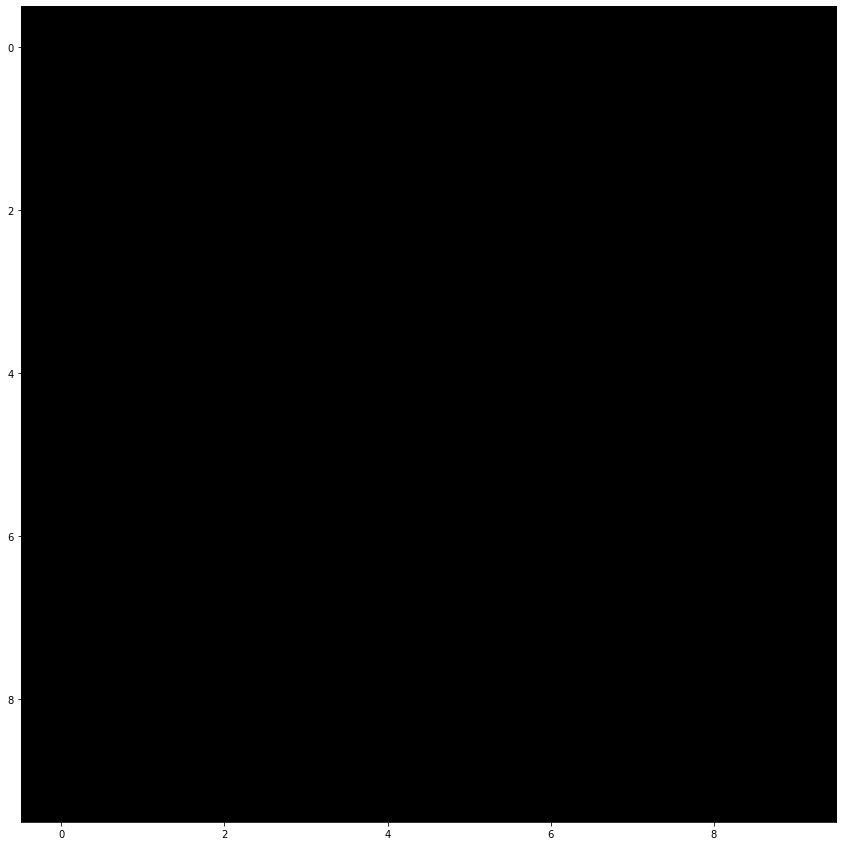

In [ ]:
def show(img, figsize=(15,15), title="Image"):
    fg = plt.figure(figsize=figsize)
    plt.imshow(img, vmin=0, vmax=255, cmap="gray")
    plt.show()

show(np.zeros((10,10)))

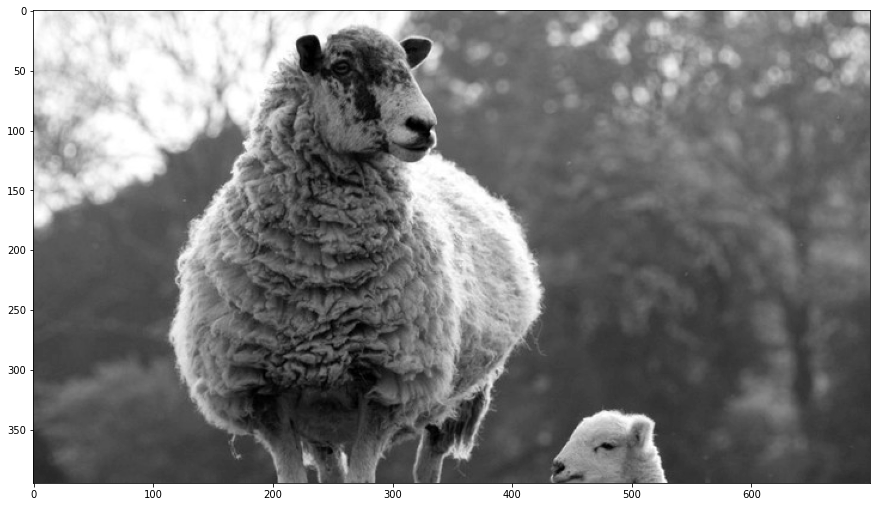

In [ ]:
img = cv2.imread('/content/sample_data/domba.jpg',0)
show(img)

In [ ]:
sys.getsizeof(img)/1024

270.14453125

In [ ]:
def get_size(filename='/content/sample_data/domba.jpg'):
    stat = os.stat(filename)
    size=stat.st_size
    return size

print(get_size())

63132


In [ ]:
from collections import Counter

fimg = img.flatten().tolist()
pxs = len(fimg)
tbl = Counter(fimg)

ntbl = {k:v/pxs for k,v in tbl.items()}
ntbl = dict(sorted(ntbl.items(), key=lambda item: item[1]))
ntbl

{1: 0.00027848101265822784,
 2: 0.0003363471971066908,
 3: 0.00036528028933092223,
 5: 0.0004448462929475588,
 0: 0.0004448462929475588,
 4: 0.00046292947558770344,
 6: 0.00054249547920434,
 8: 0.0006112115732368897,
 7: 0.0006184448462929475,
 10: 0.0006220614828209765,
 9: 0.0006690777576853526,
 11: 0.0007377938517179023,
 12: 0.0008462929475587704,
 16: 0.0008969258589511754,
 14: 0.0009113924050632911,
 13: 0.0009367088607594937,
 15: 0.0010018083182640144,
 18: 0.0010126582278481013,
 17: 0.001019891500904159,
 20: 0.001034358047016275,
 19: 0.0010596745027124774,
 22: 0.0010705244122965643,
 24: 0.0010994575045207957,
 25: 0.0011103074141048824,
 23: 0.001139240506329114,
 26: 0.0011645569620253164,
 21: 0.0011790235081374323,
 27: 0.0012224231464737793,
 28: 0.0012622061482820976,
 29: 0.0012658227848101266,
 30: 0.001298372513562387,
 203: 0.0013309222423146473,
 207: 0.001352622061482821,
 32: 0.001359855334538879,
 202: 0.0013634719710669079,
 204: 0.0013707052441229656,
 17

Kompresi gambar menggunakan arithmetic coding

In [3]:
import string
import random
from collections import Counter
import time


In [4]:
# Arithmetic Encoding
def ac_encode(txt):

    res = Counter(txt)

    # characters
    chars = list(res.keys())

    # frequency of characters
    freq = list(res.values())

    probability = []
    for i in freq:
        probability.append(i / len(txt))

    print(chars)
    print(probability)

    high = 1.0
    low = 0.0
    for c in txt:
        diff = high - low
        index = chars.index(c)
        for i in range(index):
            high = low + diff * probability[i]
            low = high

        high = low + diff * probability[index]
        print(f'char {c} -> Low: {low}   High: {high}')

    tag = (low+high)/2.0

    print('Input: ' + txt)
    print(str(low) + '< codeword <' + str(high))
    print('codeword = ' + str(tag))

    with open('encode.ac', 'w') as fw:
        for i in chars:
            fw.write(i + ' ')
        fw.write('\n')

        for i in probability:
            fw.write(str(i) + ' ')
        fw.write('\n')

        fw.write(str(tag))

    return chars, probability, tag


# Arithmetic Decoding
def ac_decode(chars, probability, tag):
    high = 1.0
    low = 0.0
    output = ''
    c = ''
    while (c != '$'):
        diff = high - low
        for i in range(len(chars)):
            high = low + diff * probability[i]
            if low < tag < high:
                break
            else:
                low = high

        c = chars[i]
        output += c

    return output


def arithmetic_coding(input):
    if '$' in input:
        input = input[0:input.index('$')]
    if input[-1] != '$':
        input += '$'

    print('Input: ' + input)

    start = time.time()
    (chars, probability, tag) = ac_encode(input)
    output = ac_decode(chars, probability, tag)
    end = time.time()

    print('Decode: ' + output)

    print('does match :  ' + str(input == output))
    print(f"Total Time: {end - start} sec\n\n")
    return input == output


############# INPUT ######################
# Random String , 100 test case
count = 0
testcase = 10
for i in range(testcase):
    # generating string
    letters = string.ascii_uppercase
    random_txt = ''.join(random.choice(letters) for i in range(13)) + '$'
    flag = arithmetic_coding(random_txt)
    if flag:
        count += 1

print(f"Total Test: {testcase}")
print(f"Succecss: {count}")


#----------------------------------------
# User given specific data
# Please use small string (less than 13 characters)
txt = "INDONESIAN"
arithmetic_coding(txt)


Input: LAQLBBMJLQRKU$
['L', 'A', 'Q', 'B', 'M', 'J', 'R', 'K', 'U', '$']
[0.21428571428571427, 0.07142857142857142, 0.14285714285714285, 0.14285714285714285, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142]
char L -> Low: 0.0   High: 0.21428571428571427
char A -> Low: 0.04591836734693877   High: 0.06122448979591836
char Q -> Low: 0.05029154518950437   High: 0.05247813411078717
char L -> Low: 0.05029154518950437   High: 0.050760099958350686
char B -> Low: 0.050492354376152786   High: 0.05055929077170226
char B -> Low: 0.050521041402816845   High: 0.0505306037450382
char M -> Low: 0.05052650559837191   High: 0.05052718862281629
char J -> Low: 0.05052694468551473   High: 0.05052699347297505
char L -> Low: 0.05052694468551473   High: 0.05052695513997051
char Q -> Low: 0.0505269476725021   High: 0.05052694916599578
char R -> Low: 0.050526948739283296   High: 0.050526948845961414
char K -> Low: 0.05052694882310181  

True